In [86]:
import pandas as pd

from geopy.geocoders import Nominatim

# Загрузка данных

In [87]:
# %%capture
# !wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx # стандартная утилита Linux для скачивания файлов по URL.

# Если wget не работает (например, в Windows), можно заменить на:
# import requests

# url = 'https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx'
# response = requests.get(url, allow_redirects=True)
# open('data_ford_price.xlsx', 'wb').write(response.content)

# В Google Colab файл сохранится в виртуальной среде и удалится после завершения сессии. Для постоянного хранения используйте Google Drive

In [88]:
data = pd.read_excel('data/data_ford_price.xlsx') 

# Обработка географических данных

In [89]:
# geolocator = Nominatim(user_agent="geoapiExercises")
# Неправильный user_agent
# Nominatim требует уникального и осмысленного user_agent (например, название вашего приложения или почта).
# Если указать что-то общее (вроде "geoapiExercises"), сервер может заблокировать запрос.

geolocator = Nominatim(user_agent="your_app_name_here")

In [90]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States


In [91]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'region': 'East Tennessee',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

Задание 7.2

Найдите почтовый код шестого объекта выборки.

In [92]:
Latitude_six = str(data['lat'][5])
Longitudes_six =  str(data['long'][5])
location_six = geolocator.reverse(Latitude_six+","+Longitudes_six)
print(location_six)

E and J Motors, 622, Southeast 82nd Avenue, Montavilla, Portland, Multnomah County, Oregon, 97216, United States


In [93]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geo_app")  # Используйте уникальный user-agent

try:
    location = geolocator.reverse(f"{latitude},{longitude}")
    address = location.raw['address']
    postcode = address.get('postcode', 'Почтовый индекс не найден')
    print(f"Почтовый индекс шестого объекта: {postcode}")
except Exception as e:
    print(f"Ошибка при геокодировании: {e}")

Почтовый индекс шестого объекта: 97216


# Отрисовка карты

In [94]:
# !pip install geopandas
# !pip install shapely

In [95]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

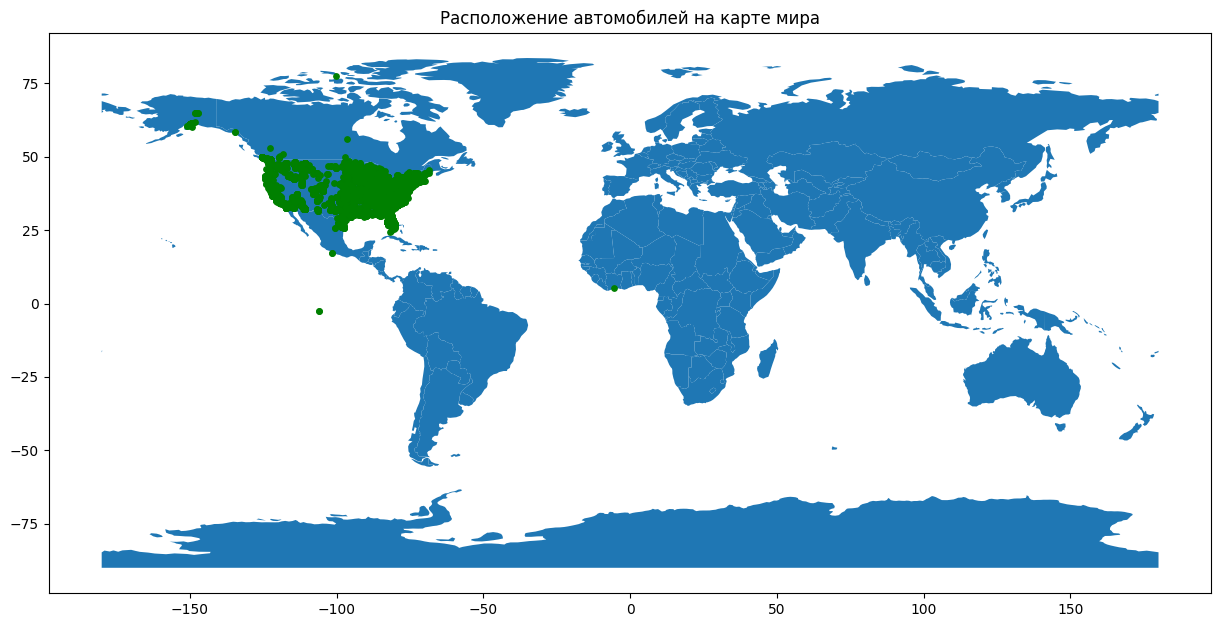

In [96]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
world = gpd.read_file('https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip')
# GeoPandas может загрузить Natural Earth Data напрямую через URL (либо вручную, из-за обновления новых версий)

gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

In [97]:
import plotly.express as px
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()